### A1: Predicting Car Price

In [2]:
### Importing the necessary libraries for this project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Checking the version of libraries 
import matplotlib 
np.__version__, pd.__version__,sns.__version__, matplotlib.__version__

('2.3.2', '2.3.2', '0.13.2', '3.10.5')

In [4]:
## Loading data from a CSV file
df = pd.read_csv("Cars.csv")


In [5]:
## Displaying the first sample of Data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
## Checking the Shape of Data that is number of samples and total columns 
df.shape

(8128, 13)

In [7]:
# Inspecting some useful statistical information using describe() method of numerical columns only
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
# Checking the data types of all features and targets because it helps to determine the model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [9]:
# Checking the columns name:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### Task 1 
 


In [10]:
## Checking the column 'owner' 
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [11]:
## To map the column 'owner' first owner =1 , Second Owner = 2, Third Owner =3, Fourth & Above Owner = 4 and Test Drive Car = 5
owner_maping = {"First Owner": 1 ,'Second Owner': 2, 'Third Owner':3, 'Fourth & Above Owner':4, 'Test Drive Car': 5 }
df["owner"] = df["owner"].map(owner_maping)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [12]:
#Veryfying the output of the label owner
df["owner"].unique()

array([1, 2, 3, 4, 5])

In [13]:
## Checking the unique values in the Fuel Column
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [14]:
# Count all unique values in 'fuel' column
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [15]:
## Deleting the rows in which contains the 'LPG', 'CNG' values
exclude_values = ['LPG','CNG']
df = df[~(df['fuel'].isin(exclude_values))]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [16]:
## Checking the mileage Column of Df
df['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [17]:
## First splitting the the values and only taking numerical value and saving to exiting database
df['mileage'] = df['mileage'].str.split().str[0]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [18]:
# converting the data type of mileage features to float 
df['mileage'] = df['mileage'].astype(float)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [19]:
# checking the data types of mileage
df['mileage'].dtype

dtype('float64')

In [20]:
## Removing the CC from the feature engine and converting the dtype from object to float
df['engine'] = df['engine'].str.split().str[0]

In [21]:
# converting the data types of feature engine
df['engine'] = df['engine'].astype(float)
# checking the data types of Feature engine
df['engine'].dtype

dtype('float64')

In [22]:
# Checking the data of feature max_power:
df['max_power'].head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [23]:
# removing bhp from the data of feature max_power and converting its data type to float
df['max_power'] = df['max_power'].str.split().str[0]
df['max_power']=df['max_power'].astype(float)
df['max_power'].head()

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [24]:
## for the feature brand. since there is no brand I will rename name to brand of the df 
df = df.rename(columns = {"name":"brand"})


In [25]:
# Getting only the first word of values of brand. 
df['brand'] = df['brand'].str.split().str[0]
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [26]:
df.drop(['torque'], axis = 1, inplace = True )

In [27]:
## Display first five rows of the dataframe
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int64  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.9+ KB


In [29]:
# df = df[~df['owner'].isin([5])]
# df
df = df.loc[df['owner'] != 5]
df


,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [30]:
## converting the selling_price in to log form
# log_selling_price = np.log(df["selling_price"])
# df['selling_price'] = log_selling_price

In [31]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


## TASK2 

In [32]:
# label encoder from sklearn 
from sklearn.preprocessing import LabelEncoder
label_brand = LabelEncoder()
# Fitting and transforming the 'brand' column
df['brand'] = label_brand.fit_transform(df['brand'])
df["brand"].unique()



array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [33]:
label_brand.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [34]:
# Displaying the first few rows of the DataFrame with label encoding
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [35]:
#  label encoding for the fuel 
from sklearn.preprocessing import LabelEncoder
label_fuel = LabelEncoder()
df['fuel'] = label_fuel.fit_transform(df['fuel'])
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,0,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,1,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,0,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,1,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [36]:
label_fuel.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [37]:
# Encoding transmission feature with labelEncoder
from sklearn.preprocessing import LabelEncoder
label_transmission = LabelEncoder()
df['transmission'] = label_transmission.fit_transform(df['transmission'])
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,Individual,1,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,0,Individual,1,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,1,Individual,1,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,0,Individual,1,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,1,Individual,1,1,16.10,1298.0,88.20,5.0


In [38]:
# Encoding seller_type features with label encoding
from sklearn.preprocessing import LabelEncoder
label_seller_type = LabelEncoder()
df['seller_type'] = label_seller_type.fit_transform(df['seller_type'])
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0


In [39]:
label_transmission.classes_

array(['Automatic', 'Manual'], dtype=object)

In [40]:
# Saving this dataframe in csv 
df.to_csv('car_final_le.csv',sep = ',', index = False, encoding = 'utf-8')

## EXploratory Data Analysis

### Univariate Analysis


### Getting Distribution Plot

<Axes: xlabel='brand', ylabel='count'>

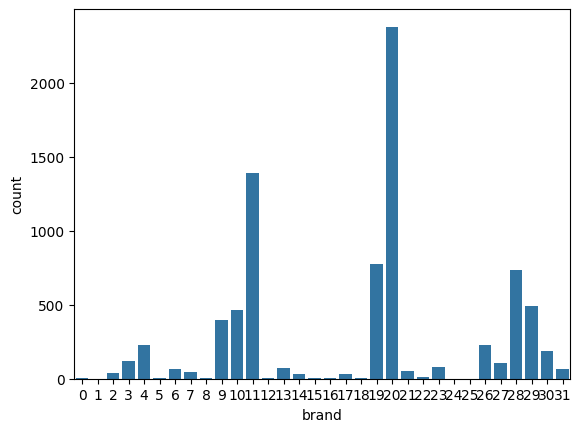

In [41]:
sns.countplot(df,x = df['brand'])


<Axes: xlabel='brand', ylabel='Count'>

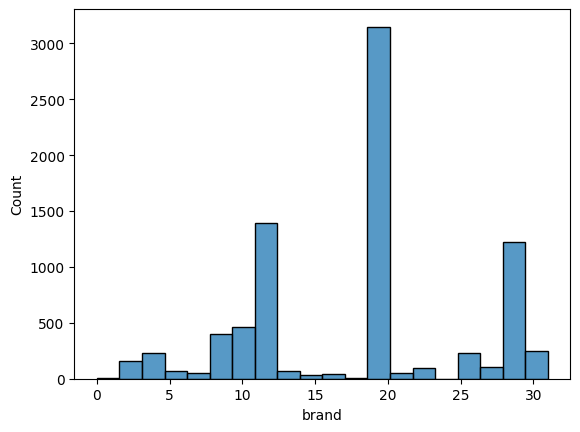

In [42]:
sns.histplot(df["brand"], bins=20)

<Axes: xlabel='selling_price', ylabel='Density'>

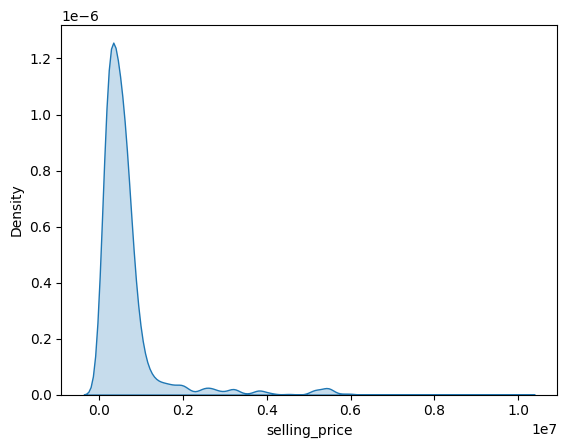

In [43]:
sns.kdeplot(df["selling_price"], shade=True)

<Axes: xlabel='year', ylabel='count'>

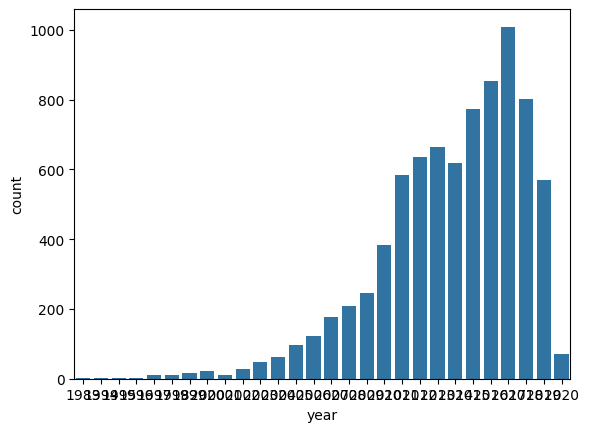

In [44]:
sns.countplot(df,x = df['year'])

<Axes: xlabel='km_driven', ylabel='count'>

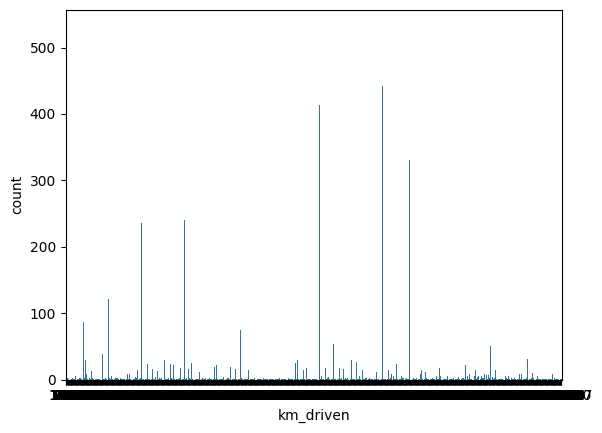

In [45]:
sns.countplot(df,x = df['km_driven'])

<Axes: xlabel='fuel', ylabel='count'>

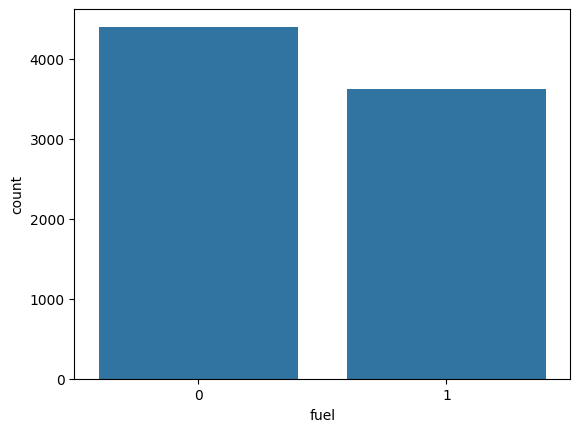

In [46]:
sns.countplot(df,x = df['fuel'])

<Axes: xlabel='seller_type', ylabel='count'>

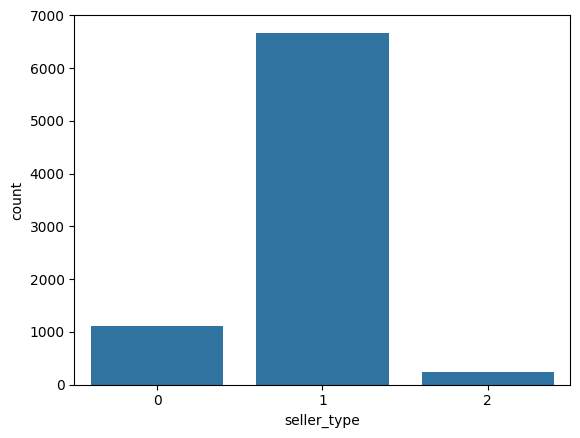

In [47]:
sns.countplot(df , x = df['seller_type'])

<Axes: xlabel='transmission', ylabel='count'>

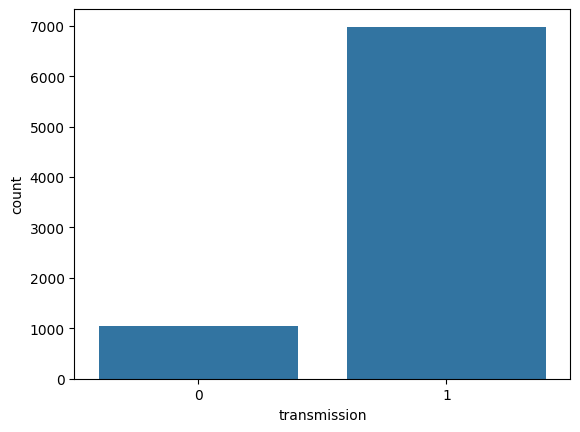

In [48]:
sns.countplot(df , x = df['transmission'])

<Axes: xlabel='owner', ylabel='count'>

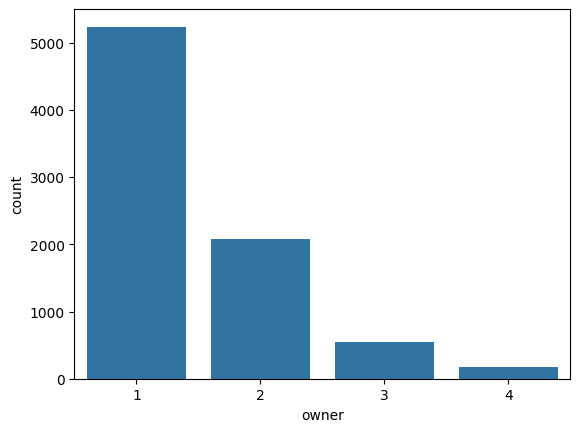

In [49]:
sns.countplot(df , x = df['owner'])

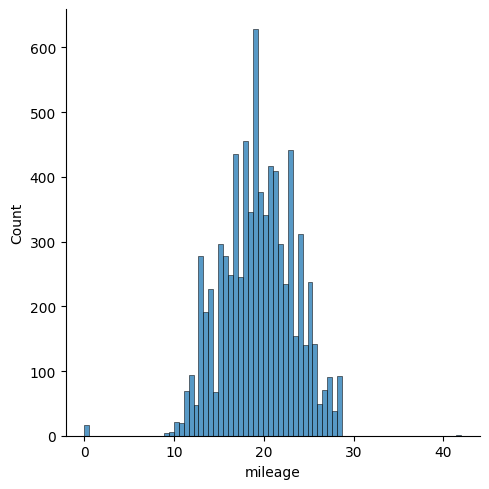

In [50]:
sns.displot(df , x = df['mileage'])

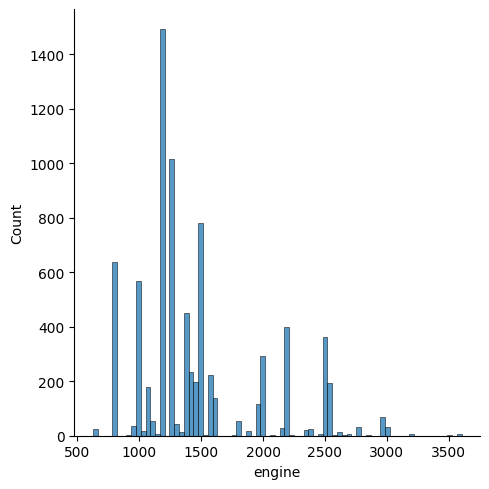

In [51]:
sns.displot(df, x = df['engine'])

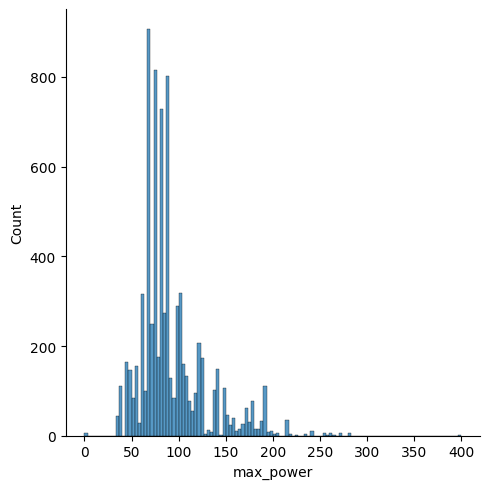

In [52]:
sns.displot(df, x = df['max_power'])


<Axes: xlabel='seats', ylabel='count'>

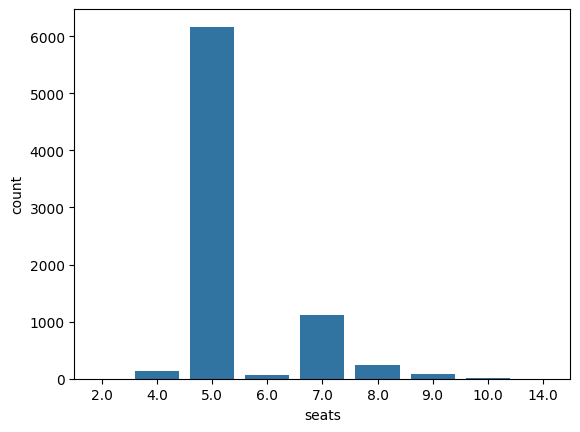

In [53]:
sns.countplot(df, x = df['seats'])


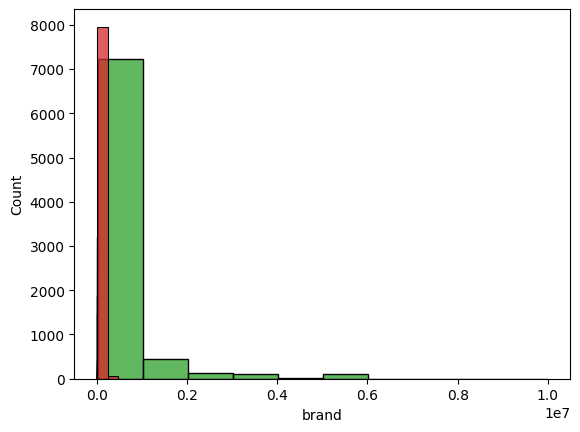

In [54]:
for column in df.columns:
    sns.histplot(df[column], bins = 10)

## Multivariate Analysis

### Box Plot

<Axes: xlabel='brand', ylabel='selling_price'>

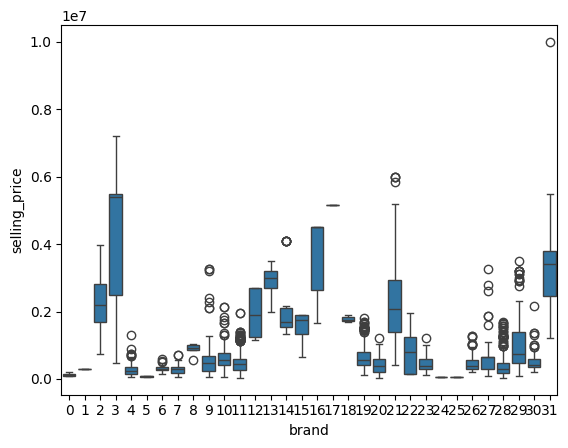

In [55]:
sns.boxplot(x = df['brand'], y= df['selling_price'])

<Axes: xlabel='year', ylabel='selling_price'>

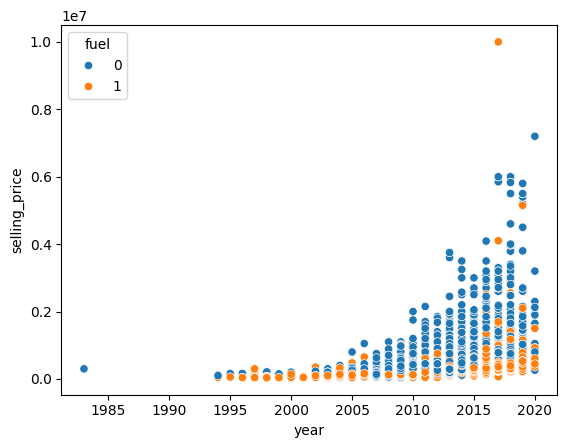

In [56]:
sns.scatterplot(x = df['year'], y= df['selling_price'], hue = df['fuel'])


<Axes: xlabel='km_driven', ylabel='selling_price'>

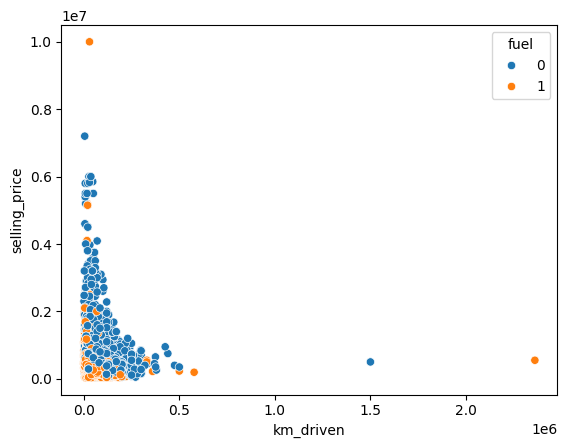

In [57]:
sns.scatterplot(x = df['km_driven'], y= df['selling_price'], hue=df['fuel'])



<Axes: xlabel='seller_type', ylabel='selling_price'>

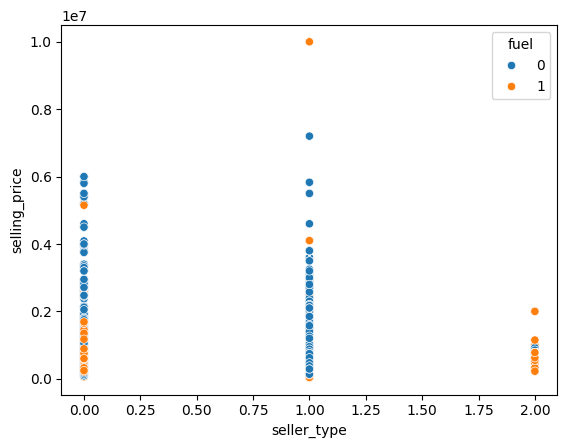

In [58]:
sns.scatterplot(x = df['seller_type'], y= df['selling_price'], hue=df['fuel'])

<Axes: xlabel='owner', ylabel='selling_price'>

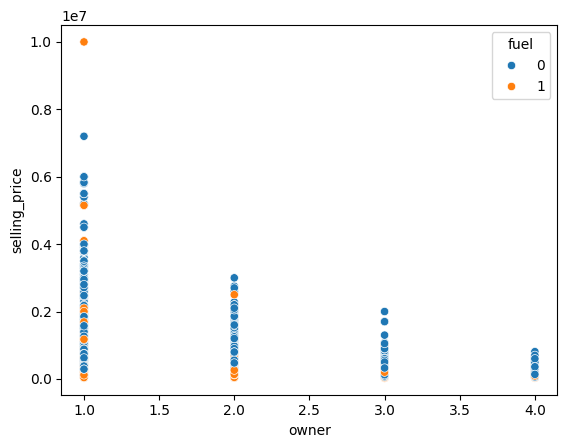

In [59]:
sns.scatterplot(x = df['owner'], y= df['selling_price'], hue=df['fuel'])

<Axes: xlabel='mileage', ylabel='selling_price'>

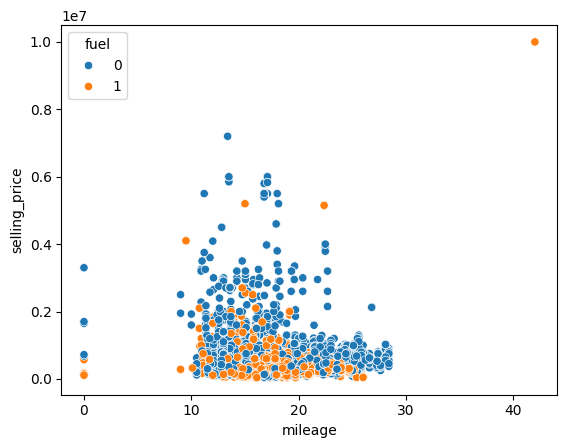

In [60]:
sns.scatterplot(x = df['mileage'], y= df['selling_price'], hue=df['fuel'])


<Axes: xlabel='engine', ylabel='selling_price'>

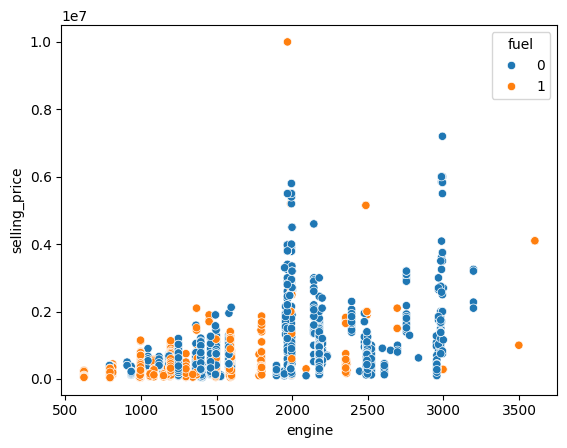

In [61]:
sns.scatterplot(x = df['engine'], y= df['selling_price'], hue=df['fuel'])


<Axes: xlabel='max_power', ylabel='selling_price'>

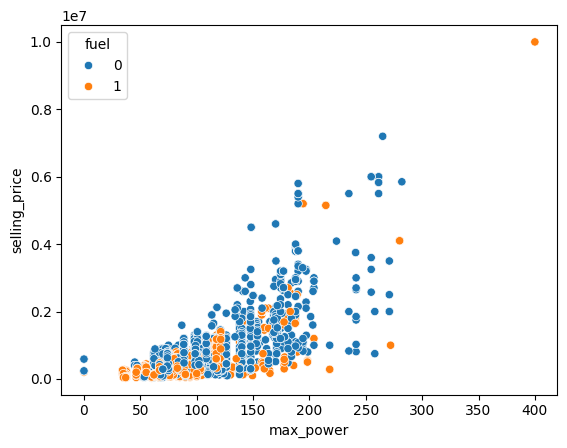

In [62]:
sns.scatterplot(x = df['max_power'], y= df['selling_price'], hue=df['fuel'])


<Axes: xlabel='seats', ylabel='selling_price'>

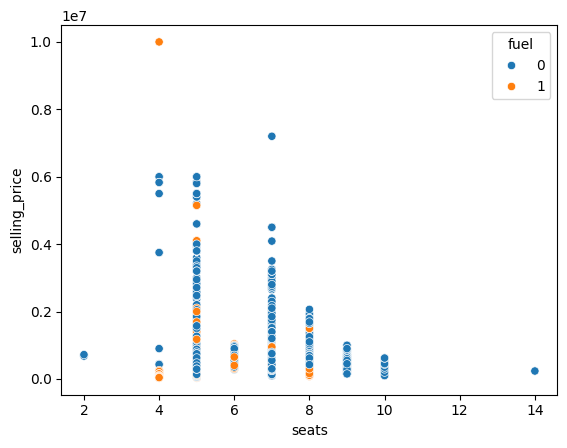

In [63]:
sns.scatterplot(x = df['seats'], y= df['selling_price'], hue=df['fuel'])


### Correlation Matrix

<Axes: >

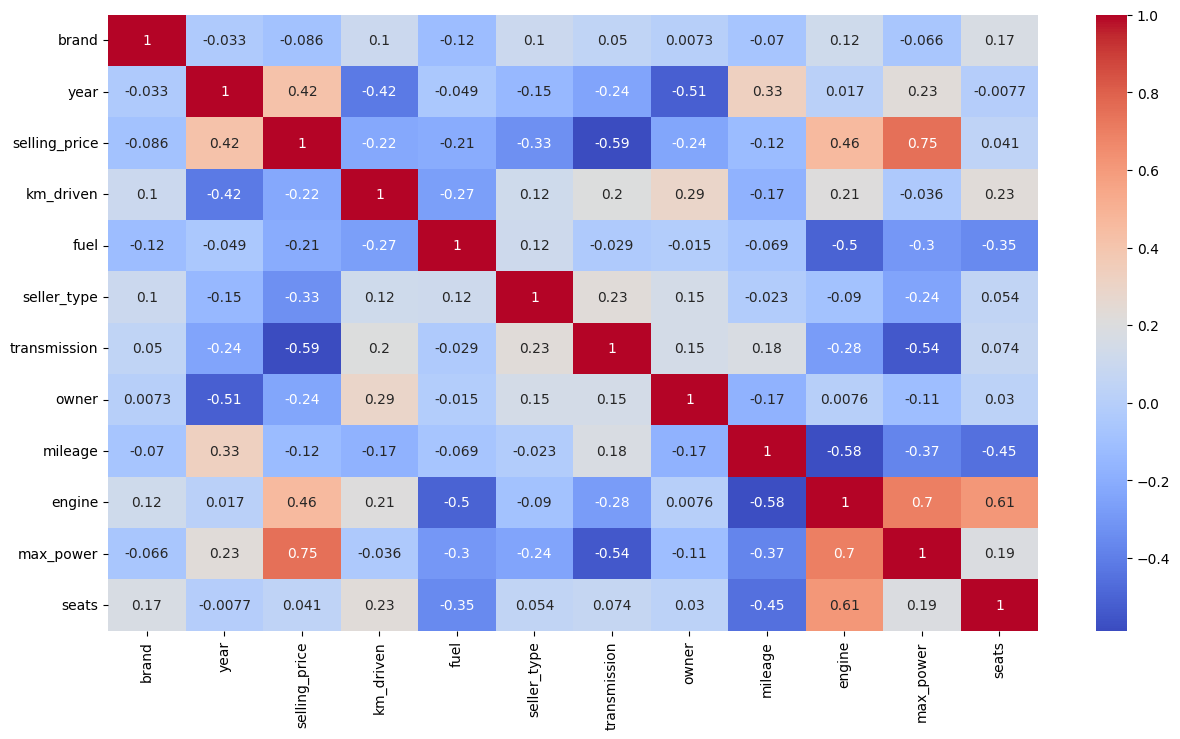

In [64]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")

## Feature Engineering

In [65]:
## Selecting features 
# X = df[['year','km_driven','fuel','seller_type','transmission','owner','mileage','engine','max_power','seats']]
X = df[['year','max_power','engine','brand','mileage','fuel']]
y = np.log(df["selling_price"])
y

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8028, dtype: float64

## Spliting to Train and Test 

In [66]:
## Spliting X and y variable for Training and Test data sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6422, 6)
X_test shape: (1606, 6)
y_train shape: (6422,)
y_test shape: (1606,)


## Preprocessing

In [67]:
#check for null values in X_train
X_train.isna().sum()

year           0
max_power    165
engine       171
brand          0
mileage      171
fuel           0
dtype: int64

In [68]:
#check for null values in X_test
X_test.isna().sum()

year          0
max_power    43
engine       43
brand         0
mileage      43
fuel          0
dtype: int64

In [69]:
#check for null values in X_train
y_train.isna().sum()

np.int64(0)

In [70]:
#check for null values in X_train
y_test.isna().sum()

np.int64(0)

<Axes: xlabel='mileage', ylabel='Count'>

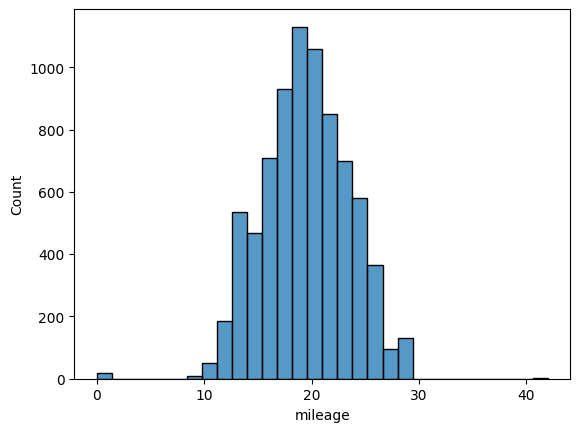

In [71]:
# Checking the distribution of Milease
sns.histplot(df, x = 'mileage' ,bins = 30)

<Axes: xlabel='engine', ylabel='Count'>

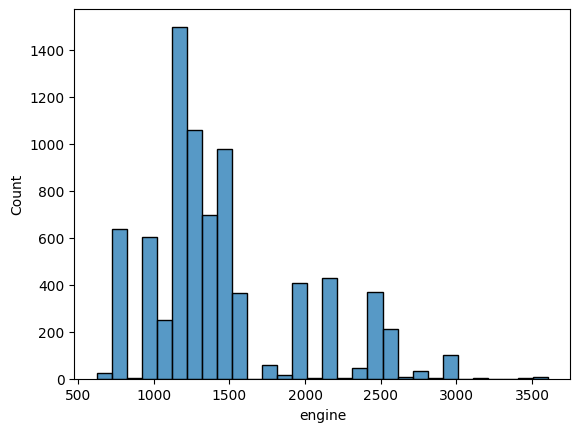

In [72]:
# Checking the distribution of Milease
sns.histplot(df, x = 'engine',bins = 30 )

<Axes: xlabel='max_power', ylabel='Count'>

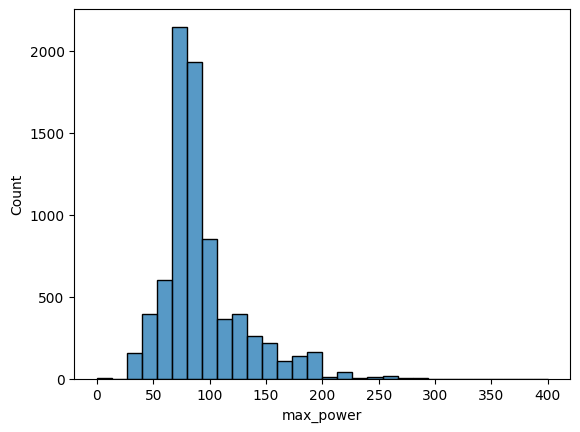

In [73]:
sns.histplot(df,x = 'max_power',bins = 30)

<Axes: xlabel='seats', ylabel='Count'>

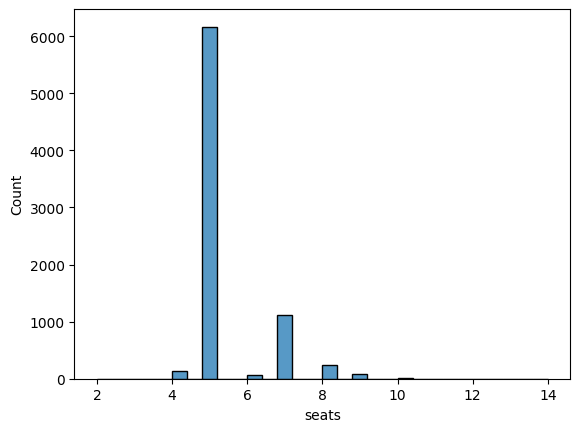

In [74]:
sns.histplot(df,x = 'seats',bins = 30)

In [75]:
# Now filling missing values in Training Dataset
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace = True)
X_train['engine'].fillna(X_train['engine'].median(), inplace = True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace = True)



In [76]:
# now filling the Test data sets with training distribution first!
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace = True)
X_test['engine'].fillna(X_train['engine'].median(), inplace = True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace = True)


In [77]:
# Now reveryfing the missling value in X_train
X_train.isna().sum()

year         0
max_power    0
engine       0
brand        0
mileage      0
fuel         0
dtype: int64

In [78]:
# Now reveryfing the missling value in X_test
X_test.isna().sum()

year         0
max_power    0
engine       0
brand        0
mileage      0
fuel         0
dtype: int64

## Checking outliers

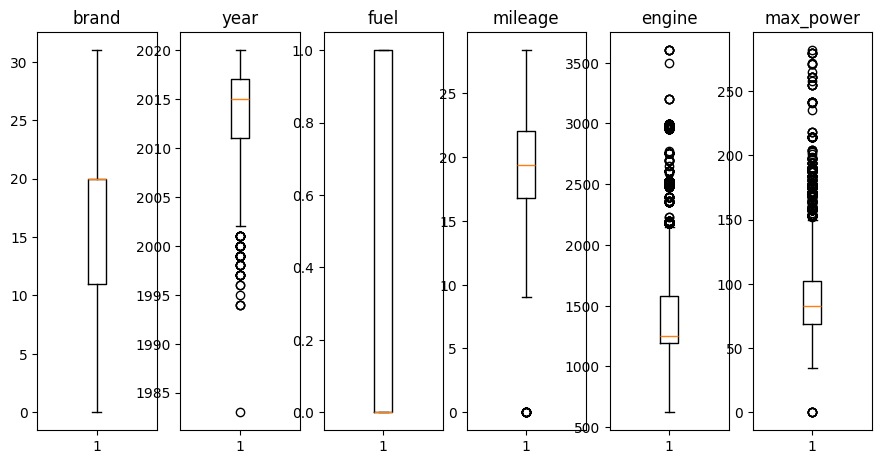

In [ ]:
# Creating a dictionary of columns:
col_dict = {"brand":1, "year":2,"fuel":3,"mileage":4,"engine":5,"max_power":6}
# Detecting outliers in each variable using box plots.
plt.figure(figsize=(20, 30))
for variable, i in col_dict.items():
    plt.subplot(5,11, i)
    plt.boxplot(X_train[variable])
    plt.title(variable)
    

In [80]:
# Defining a function to calculate the outliers in each features as it will decrease data quality in turn the efficiency of our model will also be negatively impacted
def outlier_count(col, data = X_train):
    
    # Calculating Q1 and Q3
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculating the interquartile range
    iqr = q75 - q25
    
    # Calculating the minimum and maximum value
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # Counting the number of outliers, which are the data that are less than min_val or more than max_val which have been calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # Calculating the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    # Checking to see if any outliers are present and printing information about the same
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))
        

In [81]:
# Printing all the outliers in each of the features
for col in X_train.columns:
    outlier_count(col)
    


---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%

---------------engine---------------

Number of outliers: 960
Percent of data that is outlier: 14.95%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%


In [82]:

# Scaling
from sklearn.preprocessing import StandardScaler

num_cols = ['year','max_power','engine','mileage']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [83]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 6)
Shape of X_test:  (1606, 6)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


## Modeling


In [84]:
# Using the Random Forest Regressor as it is a regression based problem
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = RandomForestRegressor()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)
print(yhat)
feature_importances = lr.feature_importances_
print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

[12.31066816 13.79226454 12.77822655 ... 10.68822886 13.42211128
 12.81796277]
MSE:  0.04309282555759178
r2:  0.9394883849115168


In [85]:
# Performing Cross validation to compare the efficincy of different algorithms in our model

# Importing the libraries for model evaluation
from sklearn.ensemble import RandomForestRegressor #we are using regression models
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


# models that we will be using, putting them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [86]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

# Defining the cross-validation strategy using KFold with 5 splits
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.0989395  -0.10214363 -0.11008487 -0.0998242  -0.10428954]; Mean: -0.10305634786841225
SVR - Score: [-0.08004995 -0.08609056 -0.08618068 -0.0806095  -0.08362104]; Mean: -0.0833103462382371
KNeighbors Regressor - Score: [-0.05374103 -0.05265822 -0.05941754 -0.04761721 -0.05799147]; Mean: -0.05428509291552687
Decision-Tree Regressor - Score: [-0.06162855 -0.06126914 -0.06526177 -0.05909582 -0.06688897]; Mean: -0.06282884896795425
Random-Forest Regressor - Score: [-0.04726766 -0.05094404 -0.05121078 -0.04531182 -0.05565422]; Mean: -0.05007770404903163


## Grid Search
According to Cross validation random Forest Regressor (the model that is used) is the model with the highest efficiency. Hence now searching for the best version of the model through grid search

In [87]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid to search over
param_grid = {'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

# Creating the Random Forest Regressor Object
rfr = RandomForestRegressor(random_state = 1)

# Creating the Random Forest Regressor instance with a fixed random state for reproducibility
grid = GridSearchCV(estimator = rfr, # Using the Random Forest Regressor instance
                    param_grid = param_grid, # Testing the different combinations of parameters from the param_grid
                    cv = kfold, # Using the defined KFold cross-validation strategy
                    n_jobs = -1, # Using all available CPU cores for parallel processing
                    return_train_score=True, # Including training scores in the results
                    refit=True, # Refitting the best model on the full dataset after finding the best parameters
                    scoring='neg_mean_squared_error') # Using negative mean squared error as the scoring metric

# Fitting the grid search to the training data
grid.fit(X_train, y_train)

# Getting the best parameters and best negative MSE score
best_params = grid.best_params_ # Best combination of parameters found during the search
best_mse = -grid.best_score_  # Best negative MSE score; negate to get actual MSE value

# Printing the results
print("Best Parameters:", best_params)
print("Best MSE:", best_mse)

Best Parameters: {'max_depth': None, 'n_estimators': 15}
Best MSE: 0.050874268518447674


## Testing

In [88]:
# Storing the predicted values for the target found by the best model based on GridSearchCV
yhat = grid.predict(X_test)

# Calculating the MSE
print("MSE: ", mean_squared_error(y_test, yhat))
print("R2: ", r2_score(y_test, yhat))

MSE:  0.04426447491860176
R2:  0.9378431366773913


In [89]:
# Comparing the actual and predicted selling prices
# Setting the desired decimal precision for display
pd.options.display.float_format = '{:.2f}'.format  # Set to 2 decimal places

pd.DataFrame({'Actual Price:': np.exp(y_test), 'Predicted Price:': np.exp(yhat)})

,Actual Price:,Predicted Price:
5948,225000.00,224924.59
6039,900000.00,977451.46
3069,320000.00,352133.73
6531,650000.00,488607.28
322,520000.00,641828.08
...,...,...
4663,440000.00,460531.68
2977,700000.00,894760.65
2459,60000.00,43216.21
928,750000.00,672248.03


## Analysis: Feature Importance
As our actual and predicted prices are very near. The next step is to analyze the importance of each feature in the model



In [90]:
#note that grid here is the Random Forest Regressor
# As the alogorith provides the feature importance score we are checking it
rfr = grid.best_estimator_

rfr.feature_importances_

array([0.4623162 , 0.43251237, 0.05234935, 0.02107817, 0.02659539,
       0.00514851])

<BarContainer object of 6 artists>

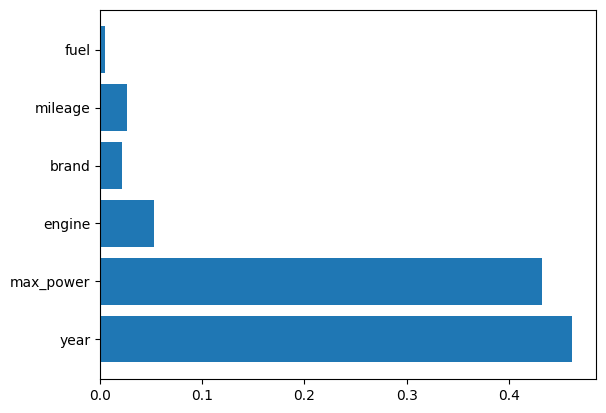

In [91]:
# Plotting the Bar Graph of the columns and their importance
plt.barh(X.columns, rfr.feature_importances_)

Text(0.5, 0, 'Random Forest Regressor Feature Importance')

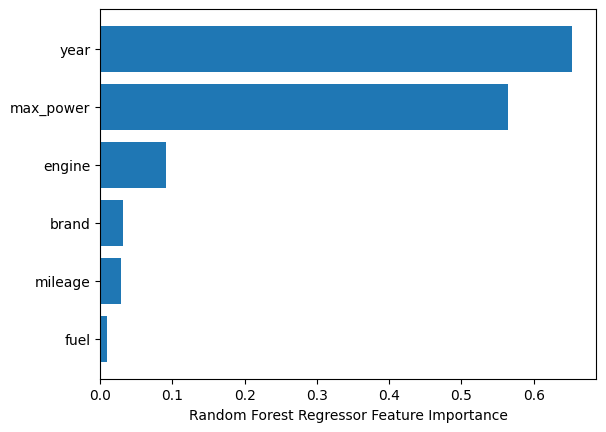

In [92]:
from sklearn.inspection import permutation_importance
# Calculating the permutation importance using the Random Forest Regressor model (rfr) on the test data (X_test, y_test)
perm_importance = permutation_importance(rfr, X_test, y_test)

# Sorting the feature indices by mean importance score
sorted_idx = perm_importance.importances_mean.argsort()

# Plotting the feature importances in a horizontal bar plot
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])

plt.xlabel("Random Forest Regressor Feature Importance")

In [93]:
# import shap

# # Creates a SHAP "Tree Explained" that explains predicted from tree-based models ( in this case the Random Forest Regressor i.e. rfr)
# explainer = shap.TreeExplainer(rfr)

# # Calculating the SHAP values for each feature and instance of data base (how much each feature value contributed to the prediction)
# shap_values = explainer.shap_values(X_test)

In [94]:
import pickle


# Saving the model to disk
filename = 'Model/car-prediction.model'
pickle.dump(grid, open(filename, 'wb'))
label_encoder_brand_path = 'Model/brand-label.model'
label_encoder_fuel_path = 'Model/brand-fuel.model'
scaler_path = 'Model/car-scalar.model'
feature_importance_path = 'Model/feature_importance.model;'
pickle.dump(label_brand, open(label_encoder_brand_path, 'wb'))
pickle.dump(label_fuel, open(label_encoder_fuel_path, 'wb'))
pickle.dump(scaler, open(scaler_path, 'wb'))
pickle.dump(rfr, open(feature_importance_path, 'wb'))
print(filename)



Model/car-prediction.model


In [95]:
loaded_model = pickle.load(open(filename, 'rb'))
scalar_model = pickle.load(open(scaler_path, 'rb'))
label_brand_model = pickle.load(open(label_encoder_brand_path, 'rb'))
label_fuel_model = pickle.load(open(label_encoder_fuel_path, 'rb'))
feature_importances_model = pickle.load(open(feature_importance_path, 'rb'))

In [96]:
# loading the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
scalar_model = pickle.load(open(scaler_path, 'rb'))
label_brand_model = pickle.load(open(label_encoder_brand_path, 'rb'))
label_fuel_model = pickle.load(open(label_encoder_fuel_path, 'rb'))
feature_importances_model = pickle.load(open(feature_importance_path, 'rb'))


In [97]:
sample = df[['year','max_power','engine','brand','mileage','fuel']].loc[1].to_frame().T
sample


,year,max_power,engine,brand,mileage,fuel
1,2014.00,103.52,1498.00,27.00,21.14,0.00


In [98]:
predicted_selling_price = loaded_model.predict(sample)
# np.set_printoptions(precision=2)
print("Predicted Price: ", str(np.exp(predicted_selling_price)))

Predicted Price:  [3012053.82235989]


In [99]:
label_brand_model.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [100]:
label_fuel_model.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [101]:
feature_importances_model.feature_importances_

array([0.4623162 , 0.43251237, 0.05234935, 0.02107817, 0.02659539,
       0.00514851])